In [ ]:
!pip uninstall numpy
!pip install numpy==1.26.3
!pip install scipy==1.10.1

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 1.26.3 which is incompatib

In [ ]:
!pip install keras
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install prettytable
!pip install albumentations
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
cvxpy 1.6.3 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:0

In [ ]:
import numpy
numpy.__version__


'1.24.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path_videos = '/content/drive/MyDrive/paths/dataset_Videos.npy'
save_path_labels = '/content/drive/MyDrive/paths/dataset_labels.npy'

In [ ]:
import numpy as np

videos = np.load(save_path_videos)
labels = np.load(save_path_labels)

In [ ]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape) # output should be (no of videos, 50, 80, 112, 3)
print("Labels shape:", labels.shape)

Videos shape: (4050, 22, 80, 112, 1)
Labels shape: (4050,)


In [ ]:
print("\nFirst 10 label array values:\n", labels[:10])



First 10 label array values:
 ['you' 'you' 'you' 'you' 'you' 'you' 'you' 'you' 'you' 'you']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels into numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels
labels_onehot = to_categorical(labels_encoded)

# Display the mapping
print("✅ Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")

print("✅ Labels encoded and one-hot encoded.")


✅ Label encoding mapping:
0 → a
1 → bye
2 → can
3 → cat
4 → demo
5 → dog
6 → hello
7 → here
8 → is
9 → lips
10 → my
11 → read
12 → you
✅ Labels encoded and one-hot encoded.


In [ ]:
label_dict = {0:"a", 1: "bye", 2:"can", 3:"cat", 4:"demo", 5:"dog", 6: "hello", 7:"here", 8:"is", 9:"lips", 10:"my", 11:"read", 12:"you"}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, LSTM, TimeDistributed, Bidirectional, Dropout, Reshape

# Model Definition
model = Sequential()

# 3D CNN Layers
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same', input_shape=(22, 80, 112, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Flatten and TimeDistributed Dense
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(256, activation='relu')))

# Bi-LSTM Layer
model.add(Bidirectional(LSTM(256, return_sequences=False)))

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(13, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 22, 80, 112, 64)     │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 11, 40, 56, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 11, 40, 56, 128)     │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 5, 20, 28, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 5, 71680)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 5, 256)              │      18,350,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 512)                 │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,691,405 (75.12 MB)

 Trainable params: 19,691,405 (75.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    videos, labels_onehot, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")


Training set: (3240, 22, 80, 112, 1), (3240, 13)
Validation set: (810, 22, 80, 112, 1), (810, 13)


In [ ]:
import gc
gc.collect()
!cat /proc/meminfo | grep Mem


MemTotal:       13290460 kB
MemFree:          154144 kB
MemAvailable:    4768356 kB


In [ ]:
del videos, labels, labels_onehot

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    #callbacks=[early_stopping, lr_scheduler],
    shuffle=True
)


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 68s 584ms/step - accuracy: 0.0699 - loss: 2.5892 - val_accuracy: 0.0802 - val_loss: 2.5646
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 75s 567ms/step - accuracy: 0.0635 - loss: 2.5653 - val_accuracy: 0.0815 - val_loss: 2.5645
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 57s 555ms/step - accuracy: 0.0817 - loss: 2.5650 - val_accuracy: 0.0815 - val_loss: 2.5644
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 560ms/step - accuracy: 0.0794 - loss: 2.5648 - val_accuracy: 0.0815 - val_loss: 2.5644
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 564ms/step - accuracy: 0.0854 - loss: 2.5636 - val_accuracy: 0.0815 - val_loss: 2.5644
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 564ms/step - accuracy: 0.0785 - loss: 2.5654 - val_accuracy: 0.0815 - val_loss: 2.5643
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 563ms/step - accuracy: 0.0777 - loss: 2.5648 - val_accuracy: 0.0852 - val_loss: 2.5667
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 81s 555ms/step - accuracy: 0.0958 - loss: 2

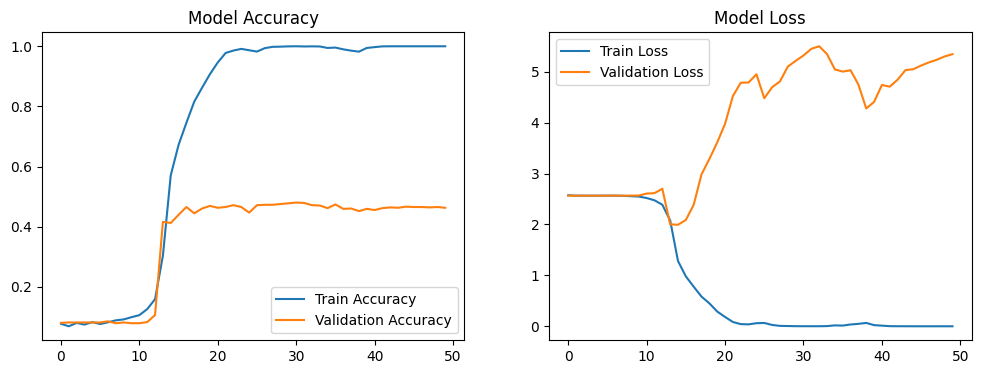

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

plot_training_history(history)


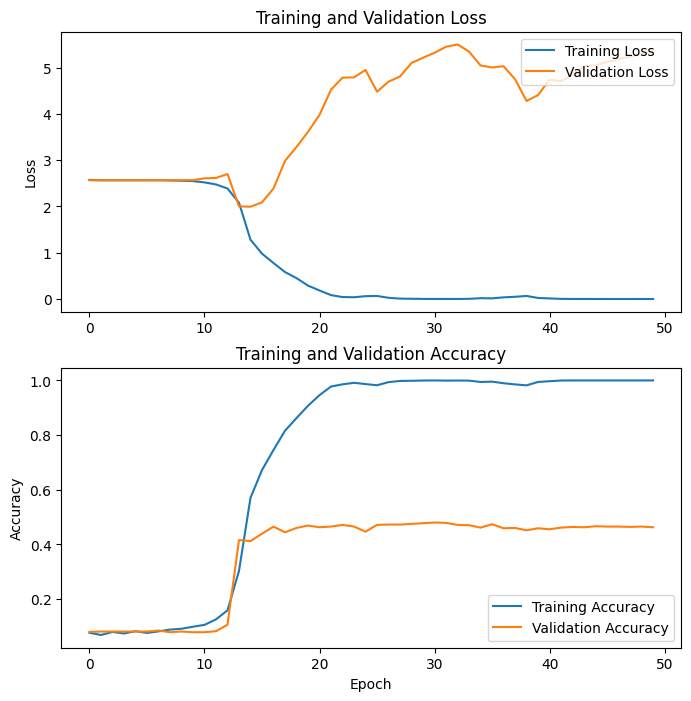

In [ ]:
# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.4597 - loss: 5.3901
Validation Accuracy: 46.30%


In [ ]:
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Convert y_pred to one-hot encoded format to match y_val
y_pred_onehot = to_categorical(y_pred, num_classes=y_val.shape[1])

# Generate classification report
report = classification_report(y_val, y_pred_onehot, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   a   |    0.49   |  0.41  |   0.44   |   64.0  |
|  bye  |    0.32   |  0.39  |   0.35   |   62.0  |
|  can  |    0.51   |  0.41  |   0.45   |   61.0  |
|  cat  |    0.51   |  0.54  |   0.52   |   59.0  |
|  demo |    0.36   |  0.32  |   0.34   |   62.0  |
|  dog  |    0.44   |  0.43  |   0.44   |   60.0  |
| hello |    0.53   |  0.53  |   0.53   |   57.0  |
|  here |    0.57   |  0.55  |   0.56   |   66.0  |
|   is  |    0.45   |  0.52  |   0.49   |   65.0  |
|  lips |    0.46   |  0.56  |   0.5    |   64.0  |
|   my  |    0.4    |  0.52  |   0.45   |   64.0  |
|  read |    0.56   |  0.45  |   0.5    |   65.0  |
|  you  |    0.5    |  0.39  |   0.44   |   61.0  |
+-------+-----------+--------+----------+---------+


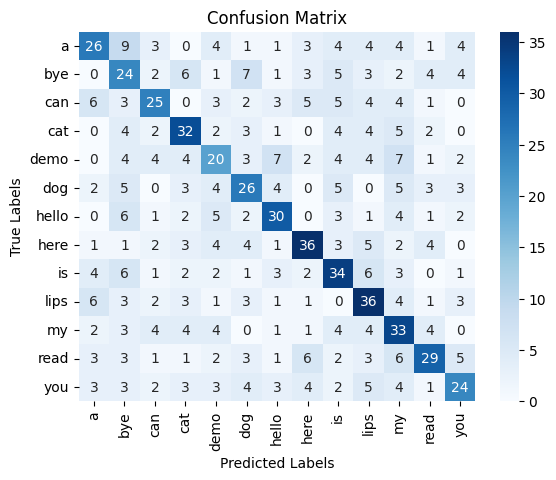

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Convert y_val to multiclass format
y_val_multiclass = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

# Now generate the confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_val_multiclass, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the trained model
model.save("/content/drive/MyDrive/models/3dcnn+BiLstm.h5")
print("✅ Model saved.")


✅ Model saved.
